### Problema 1

In [8]:
# Cargar librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def filtrar_canales(imagen, color):
    # Leer la imagen
    img = cv2.imread(imagen)
    
    # Conversión de formato BGR a RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Crear una máscara de ceros con la misma forma que la imagen
    img_salida = np.zeros_like(img)

    # Aplicar el filtro basado en el valor de 'color'
    if color == 1:
        img_salida[:, :, 2] = img[:, :, 2]  # Solo canal azul
    elif color == 2:
        img_salida[:, :, 1] = img[:, :, 1]  # Solo canal verde
    elif color == 3:
        img_salida[:, :, 0] = img[:, :, 0]  # Solo canal rojo
    elif color == 10:
        img_salida[:, :, 0] = img[:, :, 0]  # Canal rojo
        img_salida[:, :, 1] = img[:, :, 1]  # Canal verde
    elif color == 20:
        img_salida[:, :, 1] = img[:, :, 1]  # Canal verde
        img_salida[:, :, 2] = img[:, :, 2]  # Canal azul
    elif color == 30:
        img_salida[:, :, 0] = img[:, :, 0]  # Canal rojo
        img_salida[:, :, 2] = img[:, :, 2]  # Canal azul
    else:
        raise ValueError("Color no válido. Debe ser uno de los siguientes valores: 1, 2, 3, 10, 20, 30.")

    # Visualización de la salida
    plt.imshow(img_salida)
    plt.axis('off')  # Ocultar los ejes
    plt.show()

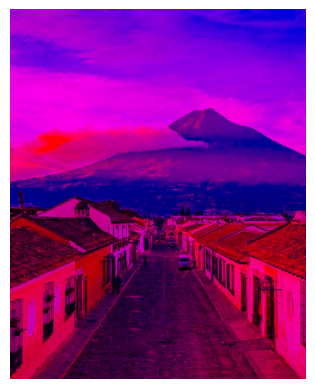

In [26]:
# Ejemplo de uso de la función

img_result = filtrar_canales("volcan_agua.jpeg", 30)

### Problema 2

In [27]:
def reconstruir_imagen_a_color(imagen1_path, imagen2_path, imagen3_path):
    # Leer las tres imágenes en escala de grises
    img1 = cv2.imread(imagen1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(imagen2_path, cv2.IMREAD_GRAYSCALE)
    img3 = cv2.imread(imagen3_path, cv2.IMREAD_GRAYSCALE)
    
    if img1 is None or img2 is None or img3 is None:
        raise ValueError("No se pudo leer una o más de las imágenes proporcionadas.")
    
    # Verificar que las tres imágenes tengan las mismas dimensiones
    if img1.shape != img2.shape or img2.shape != img3.shape:
        raise ValueError("Las tres imágenes deben tener las mismas dimensiones.")
    
    # Crear una imagen en color vacía con las mismas dimensiones
    img_color = np.zeros((img1.shape[0], img1.shape[1], 3), dtype=np.uint8)
    
    # Asignar cada imagen a un canal de color (R, G, B)
    img_color[:, :, 0] = img1  # Canal azul
    img_color[:, :, 1] = img2  # Canal verde
    img_color[:, :, 2] = img3  # Canal rojo
    
    # Mostrar la imagen reconstruida
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Ocultar los ejes
    plt.show()
    
    return img_color

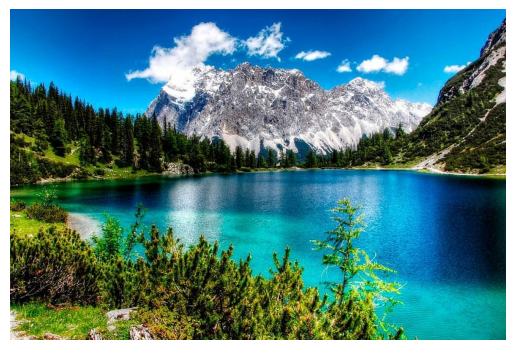

In [31]:
# Reconstrucción imagen1
img_color = reconstruir_imagen_a_color("imagen1/imagen1_salida_gray_azul.jpg", "imagen1/imagen1_salida_gray_verde.jpg", "imagen1/imagen1_salida_gray_rojo.jpg")

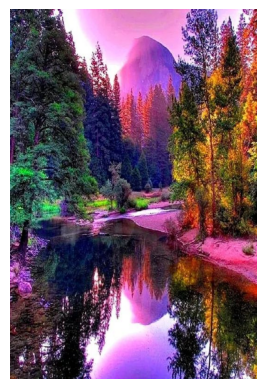

In [34]:
# Reconstrucción imagen2
img_color = reconstruir_imagen_a_color("imagen2/imagen2_salida_gray_azul.jpg", "imagen2/imagen2_salida_gray_verde.jpg", "imagen2/imagen2_salida_gray_rojo.jpg")

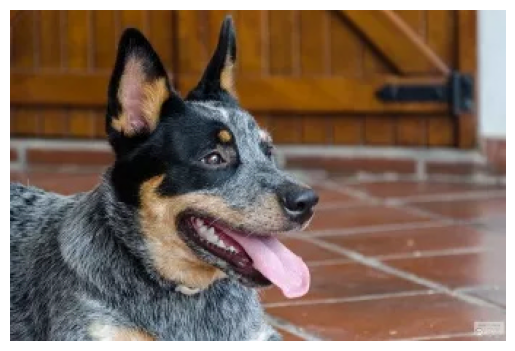

In [35]:
# Reconstrucción perro
img_color = reconstruir_imagen_a_color("perro/perro_salida_gray_azul.jpg", "perro/perro_salida_gray_verde.jpg", "perro/perro_salida_gray_rojo.jpg")

### Problema 3


In [38]:
def crear_escala_grises_3d(imagen_path):
    # Leer la imagen en color
    img_color = cv2.imread(imagen_path)
    
    if img_color is None:
        raise ValueError("No se pudo leer la imagen proporcionada.")
    
    # Convertir la imagen de BGR a RGB para mostrarla correctamente con matplotlib
    img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    
    # Extraer los canales de color
    canal_azul = img_color[:, :, 0]
    canal_verde = img_color[:, :, 1]
    canal_rojo = img_color[:, :, 2]
    
    # Guardar las imágenes de los canales en escala de grises
    cv2.imwrite("semuc_champey_azul.jpg", canal_azul)
    cv2.imwrite("semuc_champey_verde.jpg", canal_verde)
    cv2.imwrite("semuc_champey_rojo.jpg", canal_rojo)
    
    # Mostrar la imagen original y las imágenes de los canales
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].imshow(img_color_rgb)
    axs[0].set_title("Imagen Original")
    axs[0].axis('off')
    
    axs[1].imshow(canal_azul, cmap='gray')
    axs[1].set_title("Canal Azul")
    axs[1].axis('off')
    
    axs[2].imshow(canal_verde, cmap='gray')
    axs[2].set_title("Canal Verde")
    axs[2].axis('off')
    
    axs[3].imshow(canal_rojo, cmap='gray')
    axs[3].set_title("Canal Rojo")
    axs[3].axis('off')
    
    plt.show()
    
    return canal_azul, canal_verde, canal_rojo

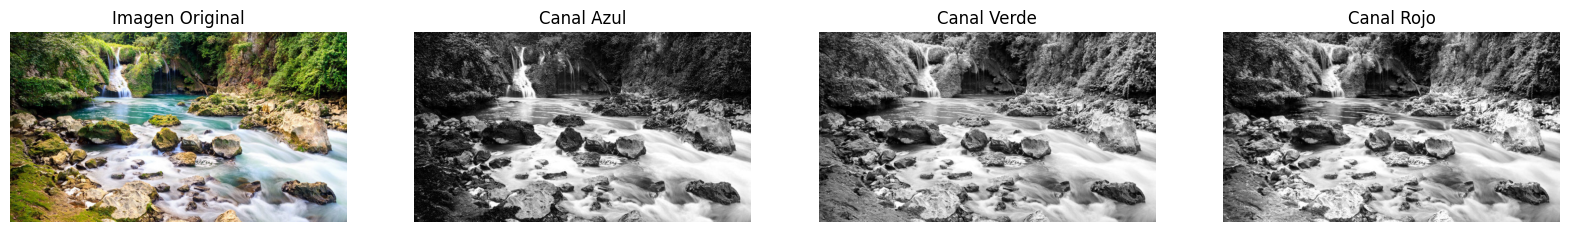

In [39]:
#Ejemplo de uso función crear_escala_grises_3d
canal_azul, canal_verde, canal_rojo = crear_escala_grises_3d("semuc_champey.jpeg")

### Problema 4


In [40]:
def calcular_histograma(canal):
    hist, bins = np.histogram(canal.flatten(), bins=256, range=[0, 256])
    return hist

def calcular_media(canal):
    return np.mean(canal)

def convertir_a_grises(img):
    # Convertir a escala de grises usando el promedio aritmético
    return np.mean(img, axis=2).astype(np.uint8)

def mostrar_histogramas(imagen_path):
    # Leer la imagen en color
    img = cv2.imread(imagen_path)
    
    if img is None:
        raise ValueError("No se pudo leer la imagen proporcionada.")
    
    # Separar los canales de color
    canal_azul = img[:, :, 0]
    canal_verde = img[:, :, 1]
    canal_rojo = img[:, :, 2]
    
    # Convertir a escala de grises
    img_grises = convertir_a_grises(img)
    
    # Calcular histogramas
    hist_azul = calcular_histograma(canal_azul)
    hist_verde = calcular_histograma(canal_verde)
    hist_rojo = calcular_histograma(canal_rojo)
    hist_grises = calcular_histograma(img_grises)
    
    # Calcular medias
    media_azul = calcular_media(canal_azul)
    media_verde = calcular_media(canal_verde)
    media_rojo = calcular_media(canal_rojo)
    media_grises = calcular_media(img_grises)
    
    # Mostrar histogramas
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histograma del canal azul
    axs[0, 0].plot(hist_azul, color='blue')
    axs[0, 0].axvline(media_azul, color='blue', linestyle='dashed', linewidth=1)
    axs[0, 0].set_title('Histograma del Canal Azul')
    
    # Histograma del canal verde
    axs[0, 1].plot(hist_verde, color='green')
    axs[0, 1].axvline(media_verde, color='green', linestyle='dashed', linewidth=1)
    axs[0, 1].set_title('Histograma del Canal Verde')
    
    # Histograma del canal rojo
    axs[1, 0].plot(hist_rojo, color='red')
    axs[1, 0].axvline(media_rojo, color='red', linestyle='dashed', linewidth=1)
    axs[1, 0].set_title('Histograma del Canal Rojo')
    
    # Histograma de la imagen en escala de grises
    axs[1, 1].plot(hist_grises, color='gray')
    axs[1, 1].axvline(media_grises, color='gray', linestyle='dashed', linewidth=1)
    axs[1, 1].set_title('Histograma de la Imagen en Escala de Grises')
    
    plt.tight_layout()
    plt.show()

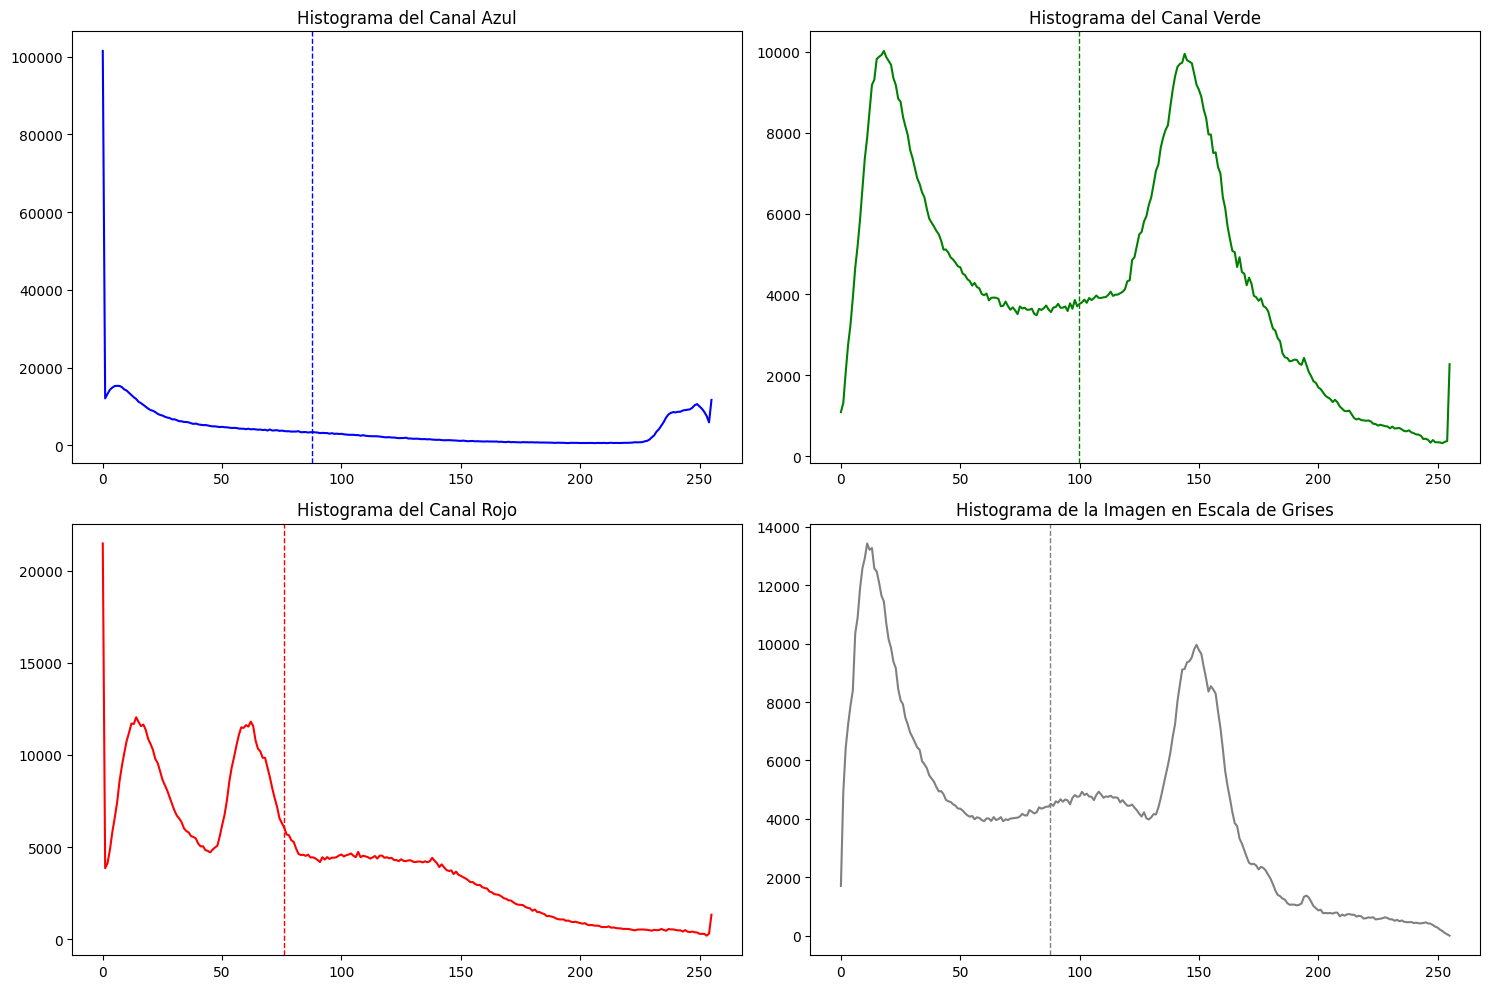

In [41]:
mostrar_histogramas("tikal.jpeg")

### Problema 5


## Escala de grises ponderado

El enfoque de escala de grises ponderado es una técnica para convertir una imagen en color a una imagen en escala de grises, en la que se asignan diferentes pesos a los canales de color (rojo, verde y azul) antes de combinarlos. Esto se hace porque los diferentes canales de color contribuyen de manera diferente a la percepción de brillo del ojo humano. Generalmente, el canal verde tiene un mayor impacto en la percepción de brillo, seguido por el canal rojo y luego el canal azul.

Una fórmula comúnmente utilizada para la conversión ponderada a escala de grises es:

 Gris = 0.2989 X R + 0.5870 X G + 0.1140 X B 

En esta fórmula:

	•	( R ) es la intensidad del canal rojo.
	•	( G ) es la intensidad del canal verde.
	•	 B  es la intensidad del canal azul.

Los coeficientes (0.2989, 0.5870, 0.1140) son los pesos que reflejan la contribución relativa de cada canal a la percepción del brillo.

In [42]:
def escala_grises_ponderada(imagen_path):
    # Leer la imagen en color
    img = cv2.imread(imagen_path)
    
    if img is None:
        raise ValueError("No se pudo leer la imagen proporcionada.")
    
    # Convertir la imagen de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Extraer los canales de color
    canal_rojo = img_rgb[:, :, 0]
    canal_verde = img_rgb[:, :, 1]
    canal_azul = img_rgb[:, :, 2]
    
    # Calcular la escala de grises ponderada
    img_gris = 0.2989 * canal_rojo + 0.5870 * canal_verde + 0.1140 * canal_azul
    img_gris = img_gris.astype(np.uint8)
    
    # Mostrar la imagen original y la imagen en escala de grises
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    axs[0].imshow(img_rgb)
    axs[0].set_title("Imagen Original")
    axs[0].axis('off')
    
    axs[1].imshow(img_gris, cmap='gray')
    axs[1].set_title("Imagen en Escala de Grises Ponderada")
    axs[1].axis('off')
    
    plt.show()
    
    return img_gris

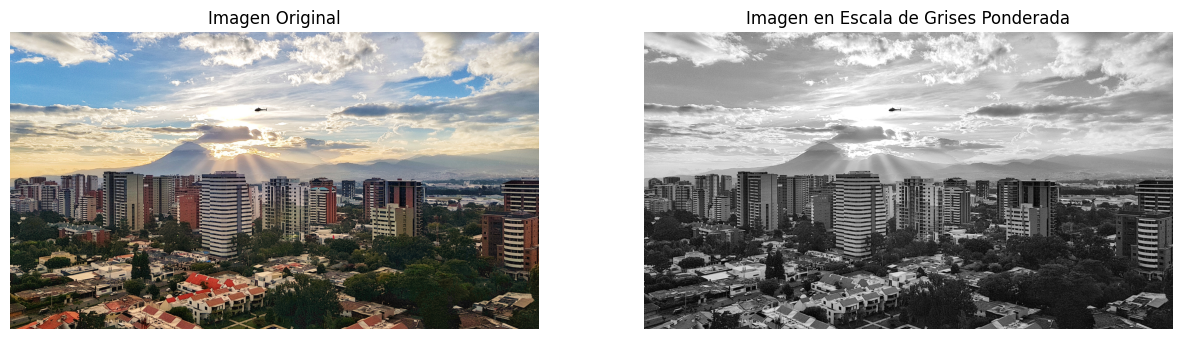

In [45]:
# Uso de la función escala_grises_ponderada
img_gris = escala_grises_ponderada("Guatemala_City.jpeg")

### Problema 6


Espacio de Color HSV

El espacio de color HSV es un modelo de color que se utiliza comúnmente en aplicaciones de procesamiento de imágenes debido a su capacidad para representar colores de una manera más intuitiva para los seres humanos que el espacio de color RGB. HSV significa:

	•	H (Hue/Tono): Representa el tipo de color o la longitud de onda del color. El valor de H va de 0 a 360 grados, donde 0 es rojo, 120 es verde y 240 es azul. El resto de los colores se distribuyen a lo largo de este espectro circular.
	•	S (Saturation/Saturación): Indica la pureza del color. Va de 0 a 100%, donde 0 es un tono de gris y 100% es el color más puro (sin mezcla con blanco).
	•	V (Value/Valor o Brillo): Representa la luminosidad del color. Va de 0 a 100%, donde 0 es completamente oscuro (negro) y 100% es el brillo máximo del color.

Mapeo de Colores al Espacio HSV

Para convertir un color del espacio RGB al espacio HSV, se utilizan fórmulas que miden el componente de cada canal y determinan los valores de H, S y V. OpenCV proporciona funciones integradas para realizar esta conversión de manera sencilla.

In [47]:
def convertir_a_hsv(imagen_path):
    # Leer la imagen en color
    img = cv2.imread(imagen_path)
    
    if img is None:
        raise ValueError("No se pudo leer la imagen proporcionada.")
    
    # Convertir la imagen de BGR a HSV
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Mostrar la imagen original y la imagen en el espacio HSV
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Convertir de BGR a RGB para mostrar correctamente la imagen original
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axs[0].imshow(img_rgb)
    axs[0].set_title("Imagen Original (RGB)")
    axs[0].axis('off')
    
    axs[1].imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
    axs[1].set_title("Imagen en Espacio HSV")
    axs[1].axis('off')
    
    plt.show()
    
    return img_hsv

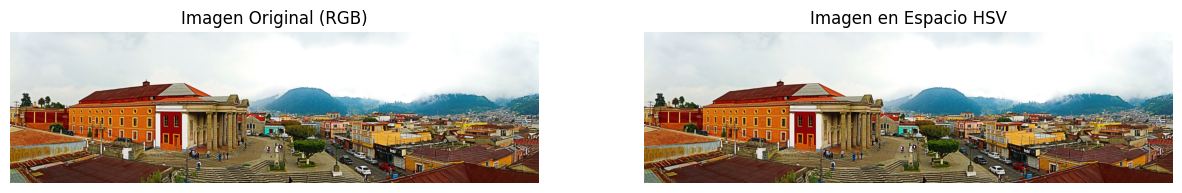

In [50]:
# Ejemplo uso función convertir_a_hsv
img_hsv = convertir_a_hsv("xelaju.jpeg")